In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

Logistic regression default

Default (with enrolled)
Dropout F1 Score: 0.7116788321167883
              precision    recall  f1-score   support

     Dropout       0.74      0.69      0.71       284
    Enrolled       0.50      0.03      0.06       159
    Graduate       0.67      0.93      0.78       442

    accuracy                           0.69       885
   macro avg       0.64      0.55      0.52       885
weighted avg       0.66      0.69      0.63       885



c:\Users\Willian Murayama\.conda\envs\icd\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


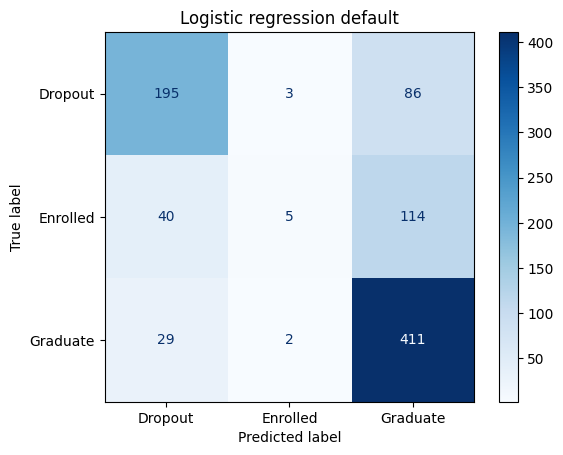

In [2]:
df = pd.read_csv(r'predict_students_dropout_and_academic_success.csv')

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

model = LogisticRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)

f1_score_per_class = f1_score(y_test, preds, average=None)
dropout_index = le.transform(["Dropout"])[0]
dropout_f1_score = f1_score_per_class[dropout_index]

print("Default (with enrolled)")
print("Dropout F1 Score:", dropout_f1_score)

print(classification_report(y_test, preds,target_names=le.classes_))

cm = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap="Blues")
plt.title("Logistic regression default")
plt.show()

Logistic regression without enrolled

Default (without enrolled)
Dropout F1 Score: 0.7389558232931727
              precision    recall  f1-score   support

     Dropout       0.86      0.65      0.74       284
    Graduate       0.80      0.93      0.86       442

    accuracy                           0.82       726
   macro avg       0.83      0.79      0.80       726
weighted avg       0.83      0.82      0.81       726



c:\Users\Willian Murayama\.conda\envs\icd\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


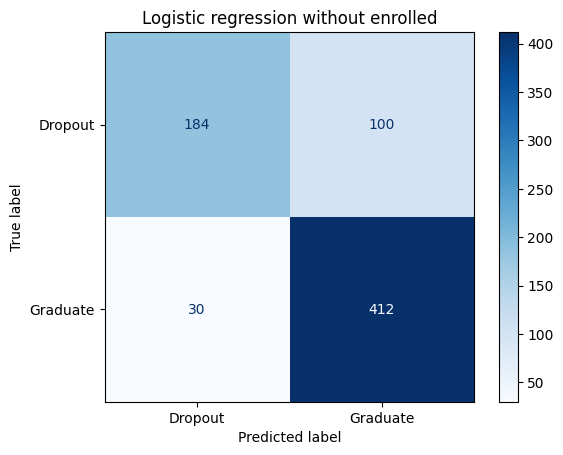

In [3]:
df = pd.read_csv(r'predict_students_dropout_and_academic_success.csv')

df = df[df["Target"] != "Enrolled"]

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

model = LogisticRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)

f1_score_per_class = f1_score(y_test, preds, average=None)
dropout_index = le.transform(["Dropout"])[0]
dropout_f1_score = f1_score_per_class[dropout_index]

print("Default (without enrolled)")
print("Dropout F1 Score:", dropout_f1_score)

print(classification_report(y_test, preds,target_names=le.classes_))

cm = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap="Blues")
plt.title("Logistic regression without enrolled")
plt.show()

Random forest classifier

Import RandomForestClassifier

In [4]:
from sklearn.ensemble import RandomForestClassifier

Random forest classifier default (with enrolled)

Random forest (with enrolled)
Dropout F1 Score: 0.8037037037037037
              precision    recall  f1-score   support

     Dropout       0.85      0.76      0.80       284
    Enrolled       0.59      0.33      0.43       159
    Graduate       0.76      0.93      0.84       442

    accuracy                           0.77       885
   macro avg       0.73      0.68      0.69       885
weighted avg       0.76      0.77      0.75       885



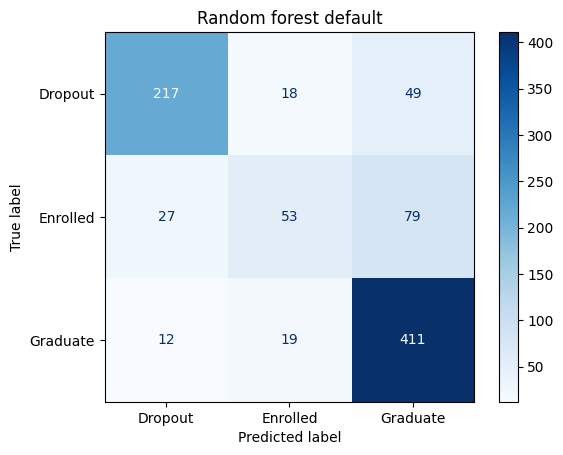

In [5]:
df = pd.read_csv(r'predict_students_dropout_and_academic_success.csv')

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

model = RandomForestClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)

f1_score_per_class = f1_score(y_test, preds, average=None)
dropout_index = le.transform(["Dropout"])[0]
dropout_f1_score = f1_score_per_class[dropout_index]

print("Random forest (with enrolled)")
print("Dropout F1 Score:", dropout_f1_score)

print(classification_report(y_test, preds,target_names=le.classes_))

cm = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap="Blues")
plt.title("Random forest default")
plt.show()

Random forest classifier without enrolled

Random forest (without enrolled)
Dropout F1 Score: 0.8671586715867159
              precision    recall  f1-score   support

     Dropout       0.91      0.83      0.87       284
    Graduate       0.90      0.95      0.92       442

    accuracy                           0.90       726
   macro avg       0.90      0.89      0.89       726
weighted avg       0.90      0.90      0.90       726



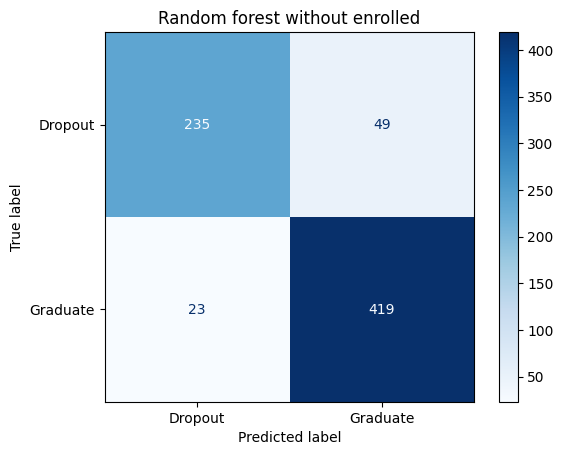

In [6]:
df = pd.read_csv(r'predict_students_dropout_and_academic_success.csv')

df = df[df["Target"] != "Enrolled"]

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

model = RandomForestClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)

f1_score_per_class = f1_score(y_test, preds, average=None)
dropout_index = le.transform(["Dropout"])[0]
dropout_f1_score = f1_score_per_class[dropout_index]

print("Random forest (without enrolled)")
print("Dropout F1 Score:", dropout_f1_score)

print(classification_report(y_test, preds,target_names=le.classes_))

cm = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap="Blues")
plt.title("Random forest without enrolled")
plt.show()

Regressão logistica teve melhoras com a remoção da classe enrolled (uma vez que essa classe não obtem métricas boas).

Porém o random forest se supera (tanto com a classe enrolled ou não), o que mais se destaca é o random forest treinado sem a classe enrolled.

Aplicaremos diferentes scalers em diferentes colunas, com o auxilio do optuna, para observar o F1 score

In [7]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from scipy.stats import wilcoxon
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
import optuna


In [8]:
def objective(trial:optuna.Trial):
    transformers = []
    scaler_options = {
    "standard": StandardScaler(),
    "minmax": MinMaxScaler(),
    "robust": RobustScaler(),
    "ordinal": OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
    "none":'passthrough'
    }

    model = RandomForestClassifier()

    for col in X.columns:
        scaler_choice = trial.suggest_categorical(f"scaler_{col}", list(scaler_options.keys()))
        transformers.append((f"{col}_scaler", scaler_options[scaler_choice], [col]))

    col_transformer = ColumnTransformer(transformers)
    steps = [("scaler", col_transformer)]

    preprocessing = trial.suggest_categorical("preprocessing", ["none", "pca", "rfe", "pca_rfe"])

    # PCA
    if preprocessing in ["pca", "pca_rfe"]:
        n_components = trial.suggest_int("pca__n_components", 1, X.shape[1])
        steps.append(("pca", PCA(n_components=n_components)))

    # RFE
    if preprocessing in ["rfe", "pca_rfe"]:
        n_features = trial.suggest_int("rfe__n_features", 1, high=X.shape[1])
        steps.append(("rfe", RFE(model, n_features_to_select=n_features)))
    
    # Modelo final
    steps.append(("classifier", model))
    pipe = Pipeline(steps)
    f1_scores = []
    for iteration in range(0, 10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
        
        # pipe = Pipeline([
        #     # ("scaler", StandardScaler()),
        #     ("scaler", col_transformer),
        #     ("clf", RandomForestClassifier()),
        # ])

        pipe.fit(X_train,y_train)
        preds = pipe.predict(X_test)
        f1_score_per_class = f1_score(y_test, preds, average=None)
        dropout_index = le.transform(["Dropout"])[0]
        dropout_f1_score = f1_score_per_class[dropout_index]
        f1_scores.append(dropout_f1_score)
    
    statistic, pvalue = wilcoxon(x=f1_scores)

    trial.set_user_attr("var", np.var(f1_scores))
    trial.set_user_attr("std", np.std(f1_scores))
    trial.set_user_attr("wilcoxon_statistic", statistic)
    trial.set_user_attr("wilcoxon_pvalue", pvalue)
    return np.mean(f1_scores)

study = optuna.create_study(direction="maximize",
                            storage="sqlite:///random_forest_scaler.db",
                            load_if_exists=True)
study.optimize(objective, n_trials=1000)

# Rebuild transformers from study.best_params
transformers = []
scaler_options = {  
    "standard": StandardScaler(),
    "minmax": MinMaxScaler(),
    "robust": RobustScaler(),
    "ordinal": OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
    "none":'passthrough'
    }

for key, value in study.best_params.items():
    if key.startswith("scaler_"):
        column_name = key.replace("scaler_", "")
        scaler = scaler_options[value]
        transformers.append((f"{column_name}_scaler", scaler, [column_name]))

col_transformer = ColumnTransformer(transformers)
pipe.fit(X_train, y_train)
preds = pipe.predict(X_test)
f1_score_per_class = f1_score(y_test, preds, average=None)
dropout_index = le.transform(["Dropout"])[0]
dropout_f1_score = f1_score_per_class[dropout_index]

print("Random forest (without enrolled and scaler)")
print("Dropout F1 Score:", dropout_f1_score)

print(classification_report(y_test, preds,target_names=le.classes_))

cm = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap="Blues")
plt.title("Random forest without enrolled and scaler")
plt.show()

[I 2025-06-05 17:01:54,271] A new study created in RDB with name: no-name-4edeb741-7c80-4857-9a8a-47563ca4f188
[I 2025-06-05 17:02:02,621] Trial 0 finished with value: 0.6282454930503082 and parameters: {'scaler_Marital status': 'standard', 'scaler_Application mode': 'ordinal', 'scaler_Application order': 'minmax', 'scaler_Course': 'ordinal', 'scaler_Daytime/evening attendance': 'standard', 'scaler_Previous qualification': 'robust', 'scaler_Previous qualification (grade)': 'minmax', 'scaler_Nacionality': 'robust', "scaler_Mother's qualification": 'none', "scaler_Father's qualification": 'none', "scaler_Mother's occupation": 'robust', "scaler_Father's occupation": 'none', 'scaler_Admission grade': 'minmax', 'scaler_Displaced': 'standard', 'scaler_Educational special needs': 'none', 'scaler_Debtor': 'robust', 'scaler_Tuition fees up to date': 'minmax', 'scaler_Gender': 'robust', 'scaler_Scholarship holder': 'none', 'scaler_Age at enrollment': 'minmax', 'scaler_International': 'minmax', '

KeyboardInterrupt: 

Próximo passo, aplicar PCA e RFE utilizando como estimator o random forest (com hiperparametros padrões)